# Exploratory Data Analysis

In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import DataFrames
playlist = pd.read_csv('playlistdf')
playlist.drop(['Unnamed: 0'], axis=1, inplace=True)
audio = pd.read_csv('dfaudio')
audio.drop(['Unnamed: 0'], axis=1, inplace=True)
genres = pd.read_csv('dfgenres')
genres.drop(['Unnamed: 0'], axis=1, inplace=True)

### Data Cleaning

In [3]:
#Explore first 5 rows of playlist dataset 
playlist.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39,False,1Jx69b09LKTuBQxkEiFfVX
2,Amy Winehouse,6Q192DXotxtaysaqNPy5yR,Back To Black,Wake Up Alone,2006-01-01,0,False,4u83mwF5tUuWlXS86UOXdu
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57,False,4Musyaro0NM5Awx8b5c627
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55,False,1CkvWZme3pRgbzaxZnTl5X


In [4]:
#Look at shape of DataFrame
playlist.shape

(9963, 8)

In [5]:
#Explore first 5 rows of genres dataset 
genres.head()

,artist_id,artist,genres
0,6jJ0s89eD6GaHleKKya26X,Katy Perry,dance pop
1,5Pwc4xIPtQLFEnJriah9YJ,OneRepublic,dance pop
2,6Q192DXotxtaysaqNPy5yR,Amy Winehouse,british soul
3,3AQRLZ9PuTAozP28Skbq8V,The Script,celtic rock
4,4dpARuHxo51G3z768sgnrY,Adele,british soul


In [6]:
#Drop any duplicates in the genres dataframe 
genres = genres.drop_duplicates(subset='artist_id')

In [7]:
#Look at shape of DataFrame
genres.shape

(3128, 3)

In [8]:
#Explore first 5 rows of audio dataset 
audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [9]:
#Look at shape of DataFrame
audio.shape

(9963, 18)

In [10]:
#Rename audio's 'id' column to 'track_id'
audio = audio.rename({'id': 'track_id'}, axis=1) 

#### Merge DataFrames

In [11]:
#Merge the playlist and audio dataframes on "track id"
dftemp = pd.merge(playlist, audio, on='track_id', how='inner')

In [12]:
#Look at shape of merged DataFrame
dftemp.shape

(10003, 25)

In [13]:
#Merge the resulting dataframe with the genres df on "artist id"
df = pd.merge(dftemp, genres, on='artist_id', how='inner')

In [14]:
#Look at info of new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10002
Data columns (total 27 columns):
artist_x            10003 non-null object
artist_id           10003 non-null object
album               10003 non-null object
track_name          10003 non-null object
release_date        10003 non-null object
popularity          10003 non-null int64
is_explicit         10003 non-null bool
track_id            10003 non-null object
danceability        10003 non-null float64
energy              10003 non-null float64
key                 10003 non-null int64
loudness            10003 non-null float64
mode                10003 non-null int64
speechiness         10003 non-null float64
acousticness        10003 non-null float64
instrumentalness    10003 non-null float64
liveness            10003 non-null float64
valence             10003 non-null float64
tempo               10003 non-null float64
type                10003 non-null object
uri                 10003 non-null object
track

In [15]:
#Drop duplicated artist column 
df.drop(['artist_y'], axis=1, inplace=True)

In [16]:
#Rename artist_x column to just be "artist"
df.rename(columns={'artist_x':'artist'}, inplace=True)

In [17]:
#Look at final dataframe again 
df.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id,danceability,energy,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,genres
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2,0.638,0.826,...,0.0803,0.649,124.072,audio_features,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4,dance pop
1,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,California Gurls,2012-03-12,72,False,6tS3XVuOyu10897O3ae7bi,0.791,0.754,...,0.1630,0.425,125.014,audio_features,spotify:track:6tS3XVuOyu10897O3ae7bi,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,https://api.spotify.com/v1/audio-analysis/6tS3...,234653,4,dance pop
2,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Last Friday Night (T.G.I.F.),2012-03-12,73,False,455AfCsOhhLPRc68sE01D8,0.649,0.815,...,0.6710,0.765,126.030,audio_features,spotify:track:455AfCsOhhLPRc68sE01D8,https://api.spotify.com/v1/tracks/455AfCsOhhLP...,https://api.spotify.com/v1/audio-analysis/455A...,230747,4,dance pop
3,Katy Perry,6jJ0s89eD6GaHleKKya26X,PRISM (Deluxe),Roar,2013-01-01,0,False,3bDGwl0X3EjQmIyFD1uif5,0.560,0.756,...,0.5500,0.404,179.771,audio_features,spotify:track:3bDGwl0X3EjQmIyFD1uif5,https://api.spotify.com/v1/tracks/3bDGwl0X3EjQ...,https://api.spotify.com/v1/audio-analysis/3bDG...,223546,4,dance pop
4,Katy Perry,6jJ0s89eD6GaHleKKya26X,One Of The Boys,I Kissed A Girl,2008-06-17,71,False,14iN3o8ptQ8cFVZTEmyQRV,0.699,0.760,...,0.1320,0.696,129.996,audio_features,spotify:track:14iN3o8ptQ8cFVZTEmyQRV,https://api.spotify.com/v1/tracks/14iN3o8ptQ8c...,https://api.spotify.com/v1/audio-analysis/14iN...,179640,4,dance pop


In [18]:
#Turn release_date into a Datetime object 
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')

In [19]:
#Print the value counts of the 'is_explicit' variable 
df['is_explicit'].value_counts()

False    9000
True     1003
Name: is_explicit, dtype: int64

In [20]:
#Convert "is_explicit" to a variable that is equal to 1 if True, 0 if False
df['is_explicit'] = df['is_explicit'].astype(int)

In [21]:
#Print the value counts to ensure they are the same as before 
df['is_explicit'].value_counts()

0    9000
1    1003
Name: is_explicit, dtype: int64

In [22]:
#Drop unncessary columns 
df = df.drop(['type', 'uri', 'analysis_url', 'time_signature', 'track_href'], axis=1)

In [23]:
#Explore the value counts of popularity 
df['popularity'].value_counts()

0     2954
44     157
42     155
43     154
40     144
      ... 
82      10
83       4
84       3
85       3
86       1
Name: popularity, Length: 87, dtype: int64

We see many songs that have a popularity of 0 which either means a) the popularity is not known or b) the song is quite old (according to the Spotify API documentation, popularity is indicated by play counts, and older songs may be played less). Therefore, these songs could skew our popularity results as they influence the scale of our popularity variable.

In [24]:
#Remove any popularity values that are equal to 0
df['popularity'] = df['popularity'][df['popularity'] != 0]

In [25]:
#Check for NA values 
df.isna().sum()

artist                 0
artist_id              0
album                  0
track_name             0
release_date           0
popularity          2954
is_explicit            0
track_id               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
genres                 0
dtype: int64

In [26]:
#Drop NA values 
df.dropna(inplace=True)

In [27]:
#Check the value counts again
df['popularity'].value_counts()

44.0    157
42.0    155
43.0    154
40.0    144
41.0    143
       ... 
82.0     10
83.0      4
85.0      3
84.0      3
86.0      1
Name: popularity, Length: 86, dtype: int64

In [28]:
#Look at the. describe function to determine the distribution of popularity 
df['popularity'].describe()

count    7049.000000
mean       43.066818
std        18.454624
min         1.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        86.000000
Name: popularity, dtype: float64

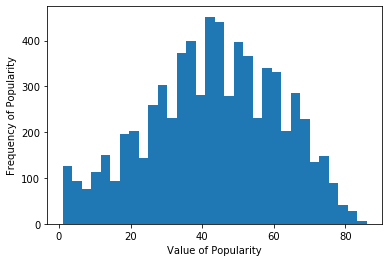

In [29]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['popularity'],bins='auto')
plt.xlabel('Value of Popularity')
plt.ylabel('Frequency of Popularity')
plt.show()

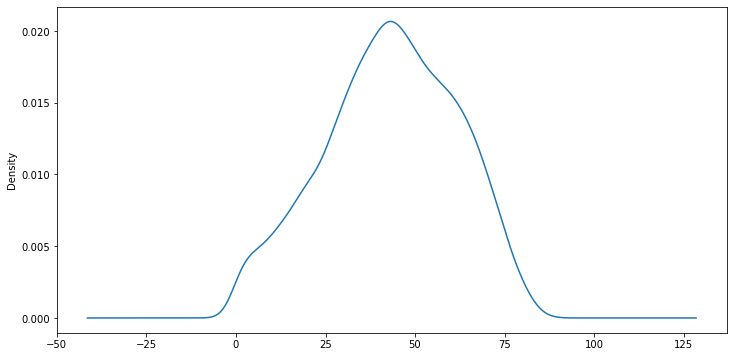

In [30]:
df['popularity'].plot(kind='kde', figsize = (12,6))
plt.show()

For the classification problem, I will look to see if different song features, particularly audio features, have an impact on the song's popularity. Right now, however, popularity ranges across many values between 0 and 100 and may be difficult to interpret for a classification problem. As a result, I will create a new variable, "ratings", that is on a scale of 1-5, based on the popularity metric. This 1-5 scale will make the target variable easier to interpret when we are performing our classification models.

In [31]:
#Create a binned variable for popularity as a proxy for our ratings
df['ratings'] = df['popularity'].apply(lambda x: 1 if x <= 20 
                                       else 2 if x>= 21 and x<40 
                                       else 3 if x>=40 and x<60
                                       else 4 if x>=60 and x<75 
                                       else 5)

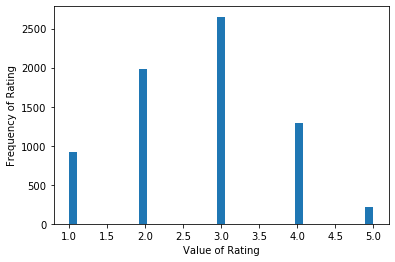

In [32]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['ratings'],bins='auto')
plt.xlabel('Value of Rating')
plt.ylabel('Frequency of Rating')
plt.show()

The distribution of the ratings appears similar to the distribution of popularity, so it looks like ratings will be a fair proxy for popularity. We will use the ratings feature in our anslysis going forward in order for ease of classification. 

In [33]:
#Drop 'popularity'; will be looking at 'ratings' instead
df = df.drop(['popularity'], axis=1)

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


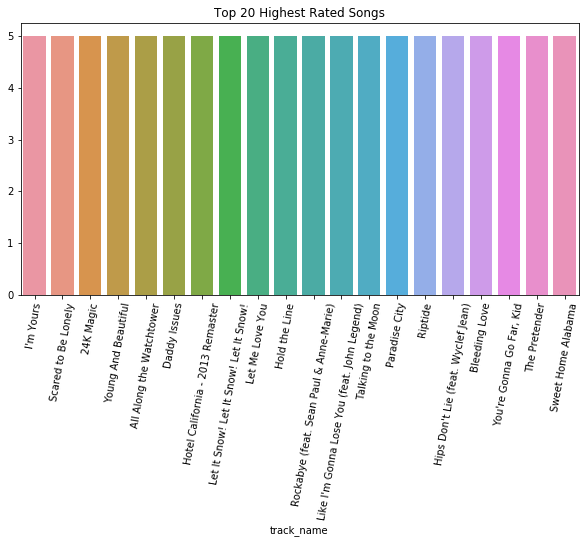

In [34]:
#Plot the top 20 highest rated songs using our new 'ratings' proxy 
plt.figure(figsize=(10,5))
topsongs = df.groupby('track_name').mean()['ratings'].sort_values(ascending=False).head(20)
sns.barplot(topsongs.index, topsongs.values)
plt.title('Top 20 Highest Rated Songs')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


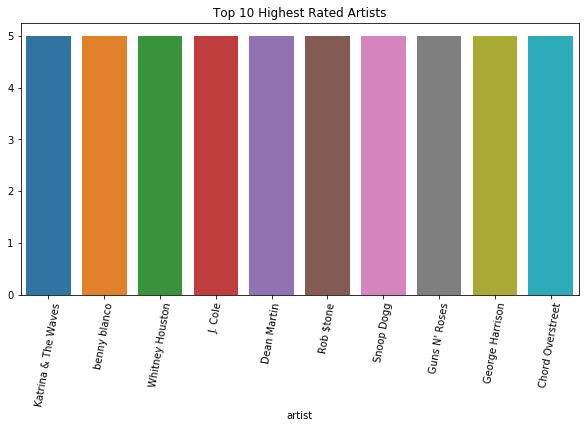

In [35]:
#Plot the top 10 highest rated artists 
plt.figure(figsize=(10,5))
topartists = df.groupby('artist').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topartists.index, topartists.values)
plt.title('Top 10 Highest Rated Artists')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


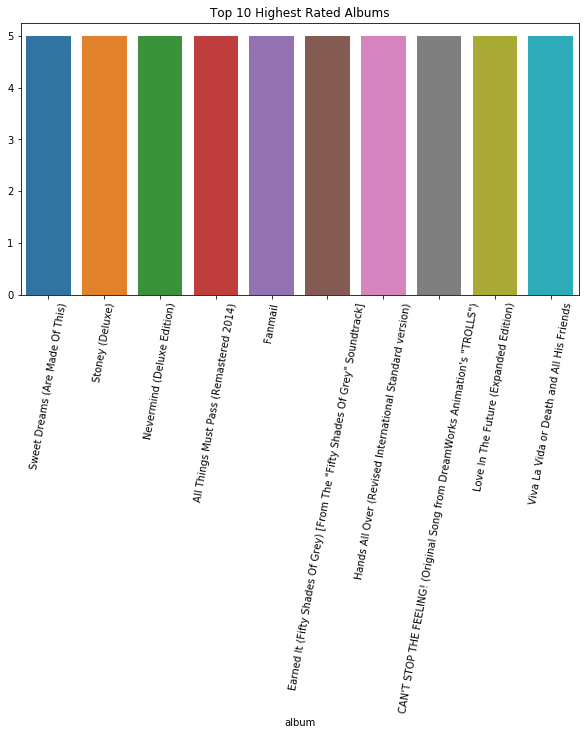

In [36]:
#Plot the top 10 highest rated albums
plt.figure(figsize=(10,5))
topalbums = df.groupby('album').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topalbums.index, topalbums.values)
plt.title('Top 10 Highest Rated Albums')
plt.xticks(rotation=80);

Next we will look at correlation and determine if any explanatory variables are strongly correlated with our target variable, ratings.

In [37]:
#Look at correlation of entire dataframe
df.corr()

,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings
is_explicit,1.000000,0.153941,0.018745,0.025473,0.075585,-0.065023,0.282102,-0.064638,-0.053981,0.012704,-0.011604,-0.001534,-0.010580,0.017195
danceability,0.153941,1.000000,0.101729,0.016043,0.108704,-0.085977,0.113095,-0.154349,-0.040160,-0.103816,0.434231,-0.198818,-0.116567,0.029128
energy,0.018745,0.101729,1.000000,0.034807,0.747404,-0.083709,0.103219,-0.709112,-0.058027,0.174610,0.378565,0.147444,-0.027122,0.009475
key,0.025473,0.016043,0.034807,1.000000,0.021869,-0.137305,0.045715,-0.027442,-0.008238,-0.003693,0.036908,0.007837,0.010965,0.009227
loudness,0.075585,0.108704,0.747404,0.021869,1.000000,-0.092302,0.072803,-0.563481,-0.198442,0.103064,0.196871,0.088756,-0.083873,0.010143
mode,-0.065023,-0.085977,-0.083709,-0.137305,-0.092302,1.000000,-0.088415,0.090889,-0.015495,-0.029183,-0.016841,-0.000115,-0.000581,0.005286
speechiness,0.282102,0.113095,0.103219,0.045715,0.072803,-0.088415,1.000000,-0.043119,-0.059544,0.094219,0.063767,0.063006,-0.066062,-0.007674
acousticness,-0.064638,-0.154349,-0.709112,-0.027442,-0.563481,0.090889,-0.043119,1.000000,0.046786,-0.101796,-0.237514,-0.113900,-0.042369,-0.014306
instrumentalness,-0.053981,-0.040160,-0.058027,-0.008238,-0.198442,-0.015495,-0.059544,0.046786,1.000000,-0.021274,-0.089436,0.014144,0.099224,-0.055559
liveness,0.012704,-0.103816,0.174610,-0.003693,0.103064,-0.029183,0.094219,-0.101796,-0.021274,1.000000,0.042317,0.030855,-0.025978,-0.031322


In [38]:
#Look only at correlation with our target variable, 'ratings'
df.corr()['ratings']

is_explicit         0.017195
danceability        0.029128
energy              0.009475
key                 0.009227
loudness            0.010143
mode                0.005286
speechiness        -0.007674
acousticness       -0.014306
instrumentalness   -0.055559
liveness           -0.031322
valence             0.069011
tempo              -0.015256
duration_ms         0.084126
ratings             1.000000
Name: ratings, dtype: float64

At a first glane, it looks like most variables have low correlation with the target variable. I'll also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [39]:
#Create new DataFrame which stacks the absolute values of the correlations and sorts them
df2 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#Create a 'pairs' column that groups the two variables whose correlations' are being compared
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

#Set this 'pairs' column as the index
df2.set_index(['pairs'], inplace = True)

#Drop the columns level_1 and level_0
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# Create a column 'cc' for correlation coefficient
df2.columns = ['cc']

#Drop dataframe duplicates 
df2.drop_duplicates(inplace=True)

#Display absolute correlations that are greater than 0.70
df2[(df2.cc>.70) & (df2.cc<1)]

,cc
pairs,
"(energy, loudness)",0.747404
"(energy, acousticness)",0.709112


The results are not surprising; it makes sense that the energy of a song would be correlated to how loud it is, since energetic songs are fast, loud and noisy. It also makes sense that energy and acousticness are correlated; songs that are acoustic tend to be slower, and lower energy, and therefore it is reasonable to assume that these two features are correlated.

### Classification Analysis EDA

In [40]:
#Look at first 5 rows of dataset again 
df.head()

,artist,artist_id,album,track_name,release_date,is_explicit,track_id,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres,ratings
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,...,1,0.0479,0.139000,0.000000,0.0803,0.649,124.072,227880,dance pop,4
1,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,California Gurls,2012-03-12,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,...,1,0.0569,0.004460,0.000000,0.1630,0.425,125.014,234653,dance pop,4
2,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Last Friday Night (T.G.I.F.),2012-03-12,0,455AfCsOhhLPRc68sE01D8,0.649,0.815,3,...,0,0.0415,0.001250,0.000043,0.6710,0.765,126.030,230747,dance pop,4
4,Katy Perry,6jJ0s89eD6GaHleKKya26X,One Of The Boys,I Kissed A Girl,2008-06-17,0,14iN3o8ptQ8cFVZTEmyQRV,0.699,0.760,5,...,1,0.0677,0.002230,0.000000,0.1320,0.696,129.996,179640,dance pop,4
6,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Part Of Me,2012-03-12,0,1nZzRJbFvCEct3uzu04ZoL,0.678,0.918,5,...,1,0.0355,0.000417,0.000000,0.0744,0.769,130.028,216160,dance pop,4


For our classification problem, we will look at how certain audio features can predict a song's rating. Therefore, to proceed with this analysis, we will build a new DataFrame that only consists of these features and will drop the remaining.


In [41]:
#Drop features
audio = df.drop(['artist', 'artist_id', 'album', 'track_name'], axis=1)

In [42]:
#Look at info of remaining variables
audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 17 columns):
release_date        7049 non-null datetime64[ns]
is_explicit         7049 non-null int64
track_id            7049 non-null object
danceability        7049 non-null float64
energy              7049 non-null float64
key                 7049 non-null int64
loudness            7049 non-null float64
mode                7049 non-null int64
speechiness         7049 non-null float64
acousticness        7049 non-null float64
instrumentalness    7049 non-null float64
liveness            7049 non-null float64
valence             7049 non-null float64
tempo               7049 non-null float64
duration_ms         7049 non-null int64
genres              7049 non-null object
ratings             7049 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(5), object(2)
memory usage: 991.3+ KB


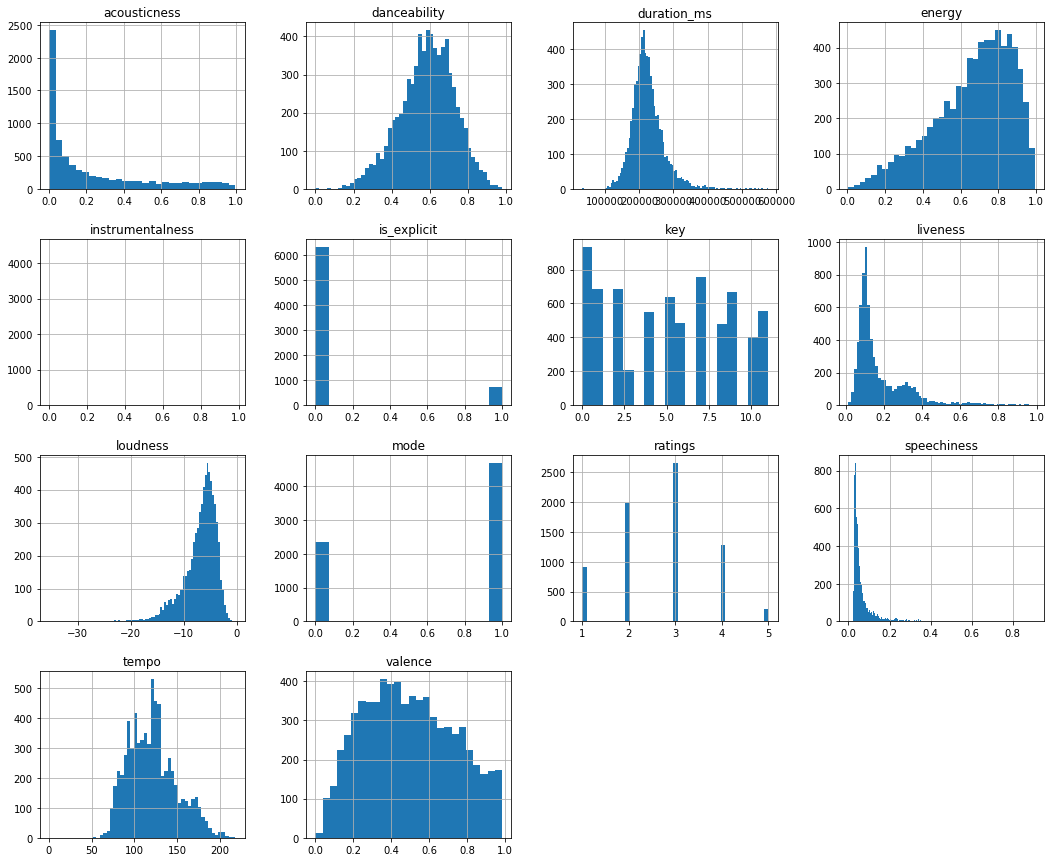

In [43]:
#First, let's plot a histogram for each column to preview their distributions 
audio.hist(figsize=(18,15), bins='auto');

The next step in EDA will be "Feature Engineering". Since ratings were built from the popularity variable, which calculates a song's popularity based on how many times it was played, one could assume that there is a relationship between the songs' release date and how often it is played; newer songs will likely be played more, older songs less. There are, however, as shown belwo, many release dates in our dataset (1669 to be exact). Therefore, I will generate a feature that takes note of which decade the song was released in, and then will use this as a way to determine if newer or older songs impact the song's popularity.

In [44]:
#Look at the number of unique release dates 
audio['release_date'].nunique()

1669

In [45]:
#Generate a 'year' variable which extracts the year from the release date 
audio['year']=pd.to_datetime(audio['release_date'], format='%m/%d/%Y').dt.year

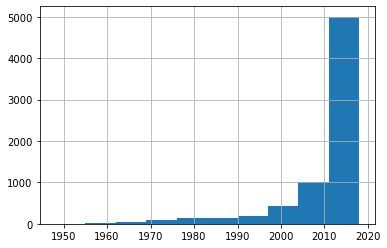

In [46]:
#Plot a histogram of the years to see which ones show up more frequently in our dataset 
audio['year'].hist()

In [47]:
#Print the number of unique years 
audio['year'].nunique()

64

Since the goal is to determine if the year that the song is from impacts the song rating, with 64 years, it may be difficult to see if one specific year has an impact vs. another, since there are 64 unique years in our dataset. As a result, we will first transform the 'year' feature into a 'decade' feature, and then will turn this decade feature into a categorical variable to determine its impact on song ratings.

In [48]:
#adding a new feature "decade" that breaks down songs that are from the 2010s, 2000s, etc.
#if the song is from a decade it will be assigned the first year of that decade
#i.e. if a song is from 1975, the decade variable will have the variable as "1970", as in from the 1970s
audio['decade'] = audio['year'].apply(lambda x: 1950 if x<1960 
                                        else 1960 if x>=1960 and x<1970 
                                        else 1970 if x>=1970 and x<1980
                                        else 1980 if x>=1980 and x<1990
                                        else 1990 if x>=1990 and x<2000
                                        else 2000 if x>=2000 and x<2010
                                        else 2010)

In [49]:
#Drop year and release date as they are no longer needed since there is the decade variable
audio = audio.drop(['year', 'release_date'], axis=1)

In [50]:
#Display 5 rows of audio again
audio.head()

,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres,ratings,decade
0,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.139000,0.000000,0.0803,0.649,124.072,227880,dance pop,4,2010
1,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,-3.729,1,0.0569,0.004460,0.000000,0.1630,0.425,125.014,234653,dance pop,4,2010
2,0,455AfCsOhhLPRc68sE01D8,0.649,0.815,3,-3.796,0,0.0415,0.001250,0.000043,0.6710,0.765,126.030,230747,dance pop,4,2010
4,0,14iN3o8ptQ8cFVZTEmyQRV,0.699,0.760,5,-3.173,1,0.0677,0.002230,0.000000,0.1320,0.696,129.996,179640,dance pop,4,2000
6,0,1nZzRJbFvCEct3uzu04ZoL,0.678,0.918,5,-4.630,1,0.0355,0.000417,0.000000,0.0744,0.769,130.028,216160,dance pop,4,2010


In [51]:
#Turn the decade variable into a dummy variable
df_new = audio['decade']
df_new = pd.get_dummies(df_new, drop_first=True, prefix='decade')

In [52]:
#Confirm that the df_new dataframe contains our dummy variables 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 6 columns):
decade_1960    7049 non-null uint8
decade_1970    7049 non-null uint8
decade_1980    7049 non-null uint8
decade_1990    7049 non-null uint8
decade_2000    7049 non-null uint8
decade_2010    7049 non-null uint8
dtypes: uint8(6)
memory usage: 96.4 KB


In [53]:
#join the new dataframe of our dummies with our original dataset 
df = pd.concat([audio, df_new], axis=1, join='inner')

In [54]:
#Confirm all the new columns are in our new dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7049 entries, 0 to 10002
Data columns (total 23 columns):
is_explicit         7049 non-null int64
track_id            7049 non-null object
danceability        7049 non-null float64
energy              7049 non-null float64
key                 7049 non-null int64
loudness            7049 non-null float64
mode                7049 non-null int64
speechiness         7049 non-null float64
acousticness        7049 non-null float64
instrumentalness    7049 non-null float64
liveness            7049 non-null float64
valence             7049 non-null float64
tempo               7049 non-null float64
duration_ms         7049 non-null int64
genres              7049 non-null object
ratings             7049 non-null int64
decade              7049 non-null int64
decade_1960         7049 non-null uint8
decade_1970         7049 non-null uint8
decade_1980         7049 non-null uint8
decade_1990         7049 non-null uint8
decade_2000         7049 non-nul

In [55]:
#Drop the decade variable 
df = df.drop(['decade'], axis=1)

In [56]:
#Look at the first 5 rows of the dataframe again 
df.head()

,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,duration_ms,genres,ratings,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.139000,0.000000,...,124.072,227880,dance pop,4,0,0,0,0,0,1
1,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,-3.729,1,0.0569,0.004460,0.000000,...,125.014,234653,dance pop,4,0,0,0,0,0,1
2,0,455AfCsOhhLPRc68sE01D8,0.649,0.815,3,-3.796,0,0.0415,0.001250,0.000043,...,126.030,230747,dance pop,4,0,0,0,0,0,1
4,0,14iN3o8ptQ8cFVZTEmyQRV,0.699,0.760,5,-3.173,1,0.0677,0.002230,0.000000,...,129.996,179640,dance pop,4,0,0,0,0,1,0
6,0,1nZzRJbFvCEct3uzu04ZoL,0.678,0.918,5,-4.630,1,0.0355,0.000417,0.000000,...,130.028,216160,dance pop,4,0,0,0,0,0,1


Several variables are not on a 0-1 scale; such as loudness, tempo, duration, mode and key. I will look to see if these variables have any outliers and if so, if they should be removed.

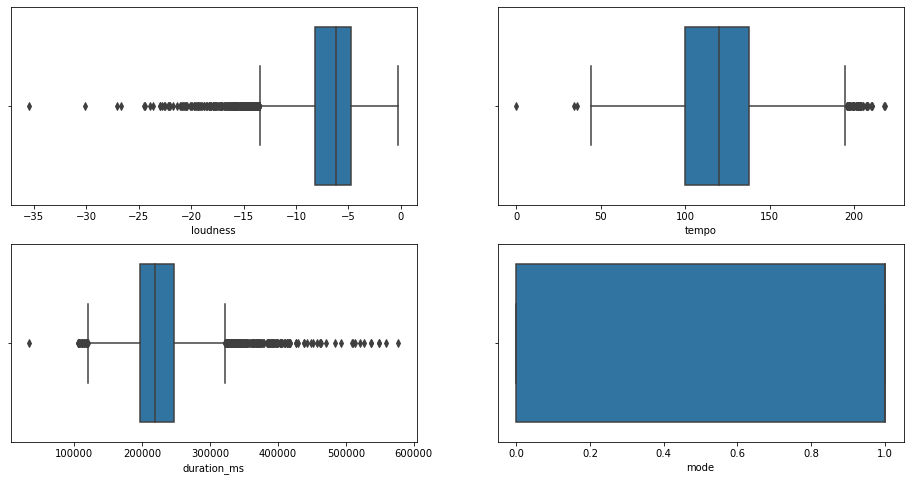

In [57]:
#Create boxplots to identify outliers for loudness, tempo, duration and mode
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=df['loudness'])
plt.subplot(222)
sns.boxplot(x=df['tempo'])
plt.subplot(223)
sns.boxplot(x=df['duration_ms'])
plt.subplot(224)
sns.boxplot(x=df['mode'])

There are several outliers in loudness, tempo and duration that could influence our results. For now, I will only drop very *extreme* outliers, but will consider dropping others later on, depending on the models' results.

In [58]:
#remove extreme outliers for loudness
df = df[df['loudness']>-25]

In [59]:
#remove extreme outliers for duration
df = df[(df['duration_ms']>50000) & (df['duration_ms']<550000)]

In [60]:
#remove extreme outliers for tempo
df = df[df['tempo']>0]

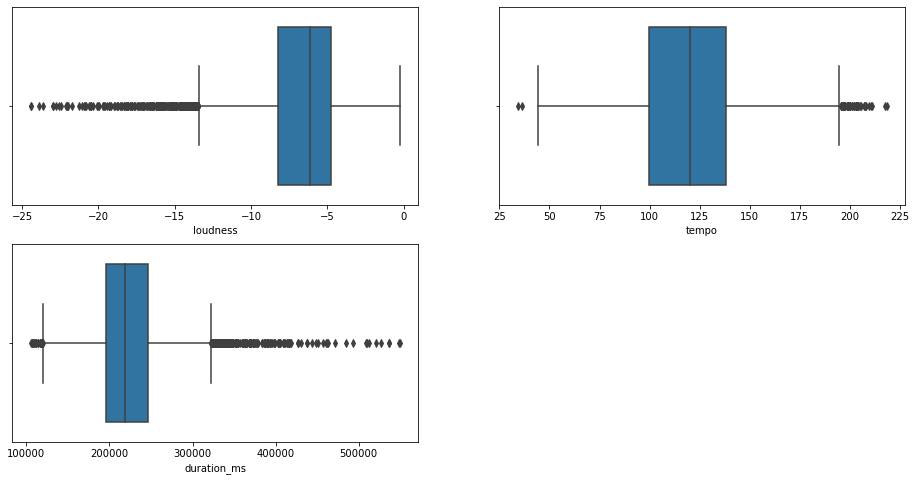

In [61]:
#Let's relook at these variables' box plots again 
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=df['loudness'])
plt.subplot(222)
sns.boxplot(x=df['tempo'])
plt.subplot(223)
sns.boxplot(x=df['duration_ms'])

These graphs look a bit better. There are, however, still several outliers in these variables, as we only removed extreme outliers from our dataset. I will first see how the models perform, and depending on the results, will look into adjusting the outliers further, if need be.

Additionally, several of the audio features are calculated on the same scale. Acousticness, energy, danceability, instrumentalness, liveness, speechiness, and valence all are measured on a 0-1 scale; the closer to 1, the higher the amount of that feature. Let's quickly confirm this with the df.describe method:

In [62]:
df.describe()

,is_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ratings,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
count,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000
mean,0.103394,0.586533,0.665243,5.141457,-6.883366,0.664394,0.069189,0.227942,0.034483,0.183465,0.493675,121.032893,224816.070303,2.700611,0.009800,0.018037,0.031104,0.049283,0.142025,0.748047
std,0.304495,0.143523,0.205369,3.577890,3.094247,0.472235,0.066548,0.276612,0.132698,0.146728,0.236411,28.315080,46485.593331,1.006858,0.098514,0.133095,0.173610,0.216473,0.349101,0.434165
min,0.000000,0.069200,0.023100,0.000000,-24.446000,0.000000,0.022400,0.000005,0.000000,0.015300,0.033100,34.082000,105147.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.495000,0.535000,2.000000,-8.229000,0.000000,0.034400,0.015900,0.000000,0.094100,0.304000,99.919000,196133.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.595000,0.703000,5.000000,-6.171000,1.000000,0.045300,0.095600,0.000009,0.123000,0.479000,119.965000,218922.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.688000,0.828000,8.000000,-4.753000,1.000000,0.071200,0.363000,0.000911,0.231000,0.678000,138.162000,246600.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.979000,0.993000,11.000000,-0.276000,1.000000,0.907000,0.995000,0.983000,0.990000,0.982000,218.356000,549080.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, I would like to take a look at the means of these features across the entire playlist and see how they compare to one another. 

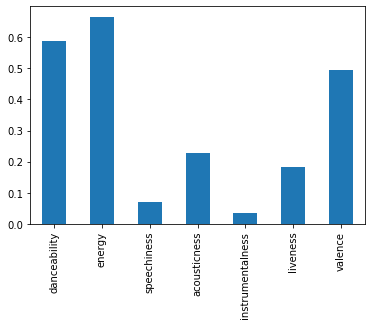

In [63]:
#Plot the means of the features that are on a 0-1 scale 
scale = ['danceability', 'energy', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence']
df[scale].mean().plot(kind='bar')

We see here that our playlists' attributes are overall songs with high danceability (songs suitable for dancing), high energy (high intensity and noise) and high valence (happy and cheery). It appears that we have a playlist full of fun, happy, dance songs! 

In [64]:
#Look at the value counts of our ratings 
df['ratings'].value_counts()

3    2648
2    1981
4    1287
1     916
5     209
Name: ratings, dtype: int64

### Comparative Graphs

Further, I would like to determine if the distribution of features differs across different ratings. If we do see major differences in the distributions' of features for a rating of 1 vs. a rating o 5, then this is a good indication that certain increases/decreasse in certain features will impact our ability to predict the rating of a song. Before I conduct any modeling, I will look at the distrubtion of several of our continous features.

#### a. Danceability

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: danceability, dtype: object

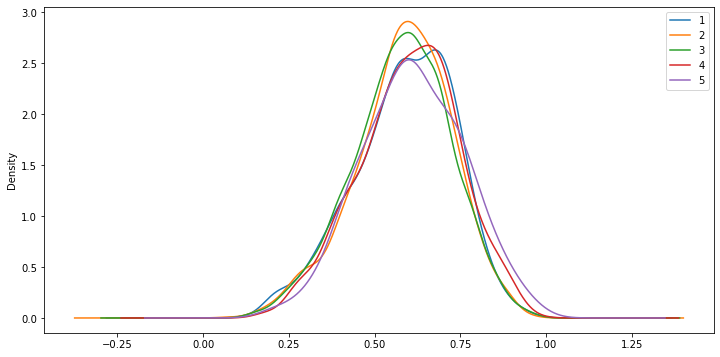

In [65]:
#Plot KDE graph for danceability across all ratings 
df.groupby("ratings").danceability.plot(kind='kde', legend=True, figsize=(12,6))

In [66]:
##Make sure the rating is an integer an then order should work 
#Otherwise sort the unique values in a cell as a varaible and then put that into the enumerate 

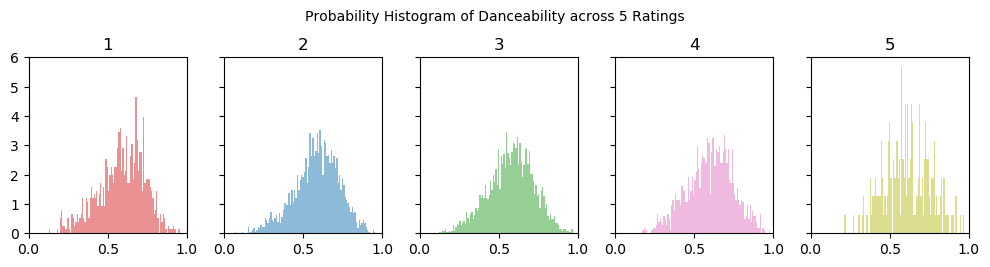

In [67]:
# Plot histograms for danceability across 5 ratings 
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, rating) in enumerate(zip(axes.flatten(), [1,2,3,4,5])):
    x = df.loc[df.ratings==rating, 'danceability']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(rating), color=colors[i])
    ax.set_title(rating)

plt.suptitle('Probability Histogram of Danceability across 5 Ratings', y=1.05, size=10)
ax.set_xlim(0, 1); ax.set_ylim(0, 6);
plt.tight_layout();

Danceability has a similar probability distribution across ratings 1-4; the only notable difference is the songs that have 5 ratings that higher probability of high danceability scores. This is also proven from the KDE plot above, where ratings 1-4 follow a similar pattern, but the KDE for a rating of 5 is shifted slightly to the right. 

#### b. Energy

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: energy, dtype: object

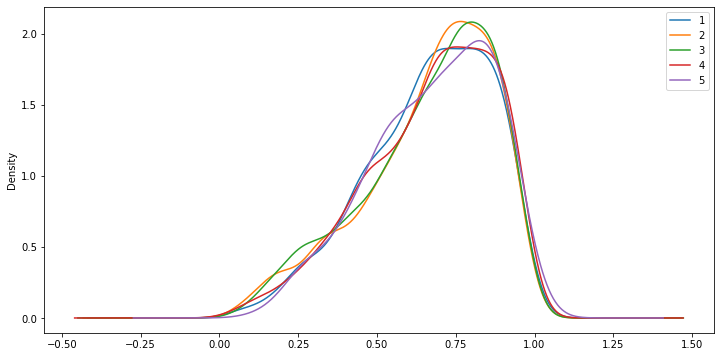

In [68]:
#Plot KDE graph for energy across all ratings 
df.groupby("ratings").energy.plot(kind='kde', legend=True, figsize=(12,6))

For energy, all the ratings follow a similar pattern. Ratings 3 and 4 have the highest peaks, however the peak for rating 5 is a slightly higher energy value than these other high-rated songs. 


#### c. Speechiness

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: speechiness, dtype: object

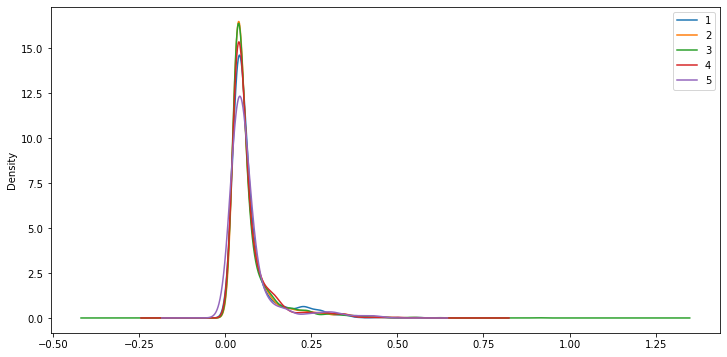

In [69]:
#Plot KDE graph for speechiness across all ratings 
df.groupby("ratings").speechiness.plot(kind='kde', legend=True, figsize=(12,6))

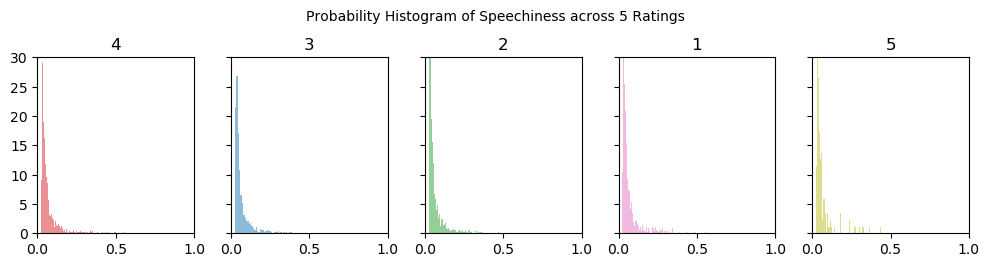

In [70]:
# Plot histograms for speechiness across 5 ratings 
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, rating) in enumerate(zip(axes.flatten(), df.ratings.unique())):
    x = df.loc[df.ratings==rating, 'speechiness']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(rating), color=colors[i])
    ax.set_title(rating)

plt.suptitle('Probability Histogram of Speechiness across 5 Ratings', y=1.05, size=10)
ax.set_xlim(0, 1); ax.set_ylim(0, 30);
plt.tight_layout();

'Speechiness', according to the API, is defined as the prescence of spoken-like words in a song. The more speechiness a song has, the more it resembles a podcast, or an audiobook. When looking at the KDE graphs, higher rated songs with ratings of 3 and 4 have the highest density of speechiness, while songs with a rating of 5 peak at a significantly lower density than other songs. When looking at the histograms, however, it appears that all ratings follow a similar distribution pattern, so the differences in the distribution of speechiness across ratings are relatively insignificant.

#### d. Acousticness

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: acousticness, dtype: object

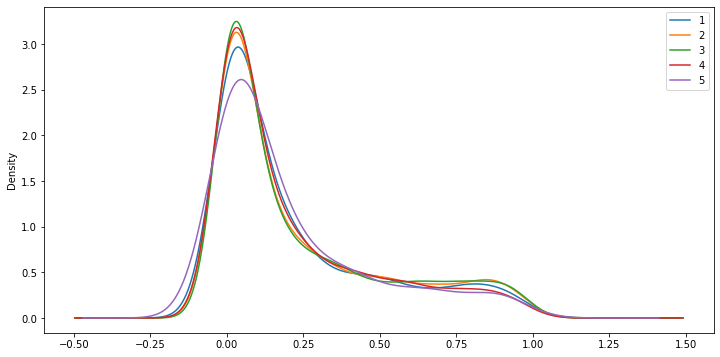

In [71]:
#Plot KDE graph for acousticness across all ratings 
df.groupby("ratings").acousticness.plot(kind='kde', legend=True, figsize=(12,6))

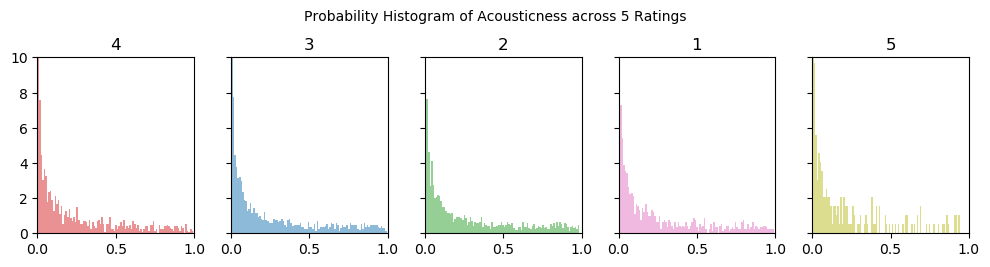

In [72]:
# Plot histograms for speechiness across 5 ratings 
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, rating) in enumerate(zip(axes.flatten(), df.ratings.unique())):
    x = df.loc[df.ratings==rating, 'acousticness']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(rating), color=colors[i])
    ax.set_title(rating)

plt.suptitle('Probability Histogram of Acousticness across 5 Ratings', y=1.05, size=10)
ax.set_xlim(0, 1); ax.set_ylim(0, 10);
plt.tight_layout();

Songs across all ratings show very simliar distributions of Acousticness, with no major differences across the ratings scale.

#### e. Instrumentalness

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: instrumentalness, dtype: object

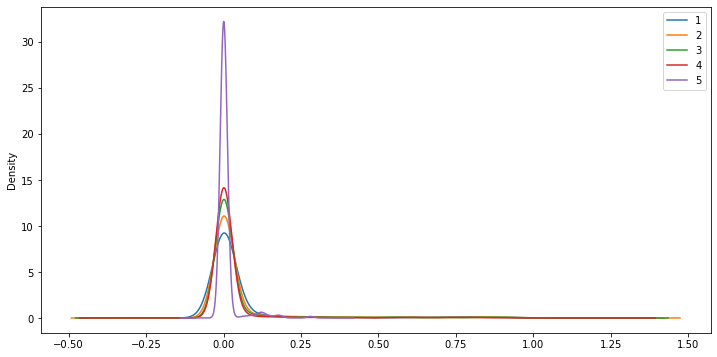

In [73]:
#Plot KDE graph for acousticness across all ratings 
df.groupby("ratings").instrumentalness.plot(kind='kde', legend=True, figsize=(12,6))

For instrumentalness, songs with a rating of 5 have more songs that are valued at 0, however all of the ratings here follow a similar distribution, and there are no major differences across the ratings. 

#### f. Liveness

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: liveness, dtype: object

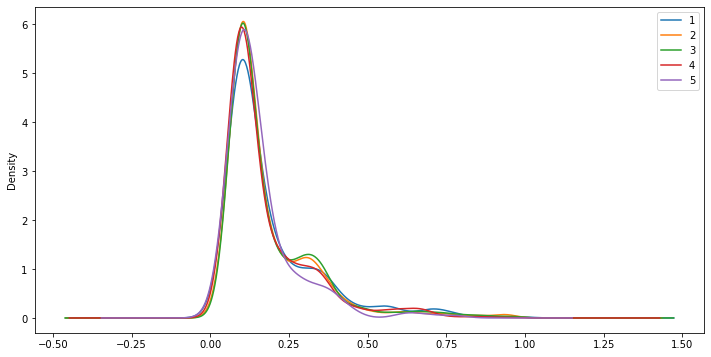

In [74]:
#Plot KDE graph for liveness across all ratings 
df.groupby("ratings").liveness.plot(kind='kde', legend=True, figsize=(12,6))

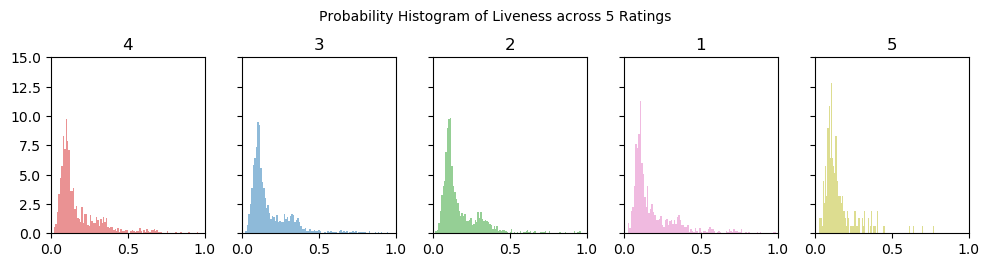

In [75]:
# Plot histograms for liveness across 5 ratings 
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, rating) in enumerate(zip(axes.flatten(), df.ratings.unique())):
    x = df.loc[df.ratings==rating, 'liveness']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(rating), color=colors[i])
    ax.set_title(rating)

plt.suptitle('Probability Histogram of Liveness across 5 Ratings', y=1.05, size=10)
ax.set_xlim(0, 1); ax.set_ylim(0, 15);
plt.tight_layout();

Ratings 1 through 5 have similar distributions, all with a peak inbetween 0 and 0.25. Overall, the liveness of the songs in this playlist skew towards the left, but there are no notable differences between songs that have low or high ratings.

#### g. Valence

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: valence, dtype: object

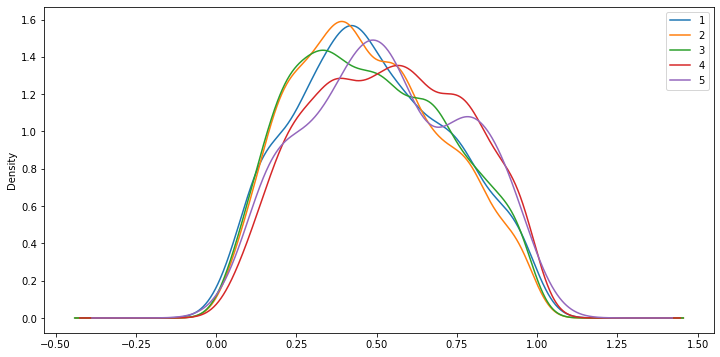

In [76]:
#Plot KDE graph for valence across all ratings 
df.groupby("ratings").valence.plot(kind='kde', legend=True, figsize=(12,6))

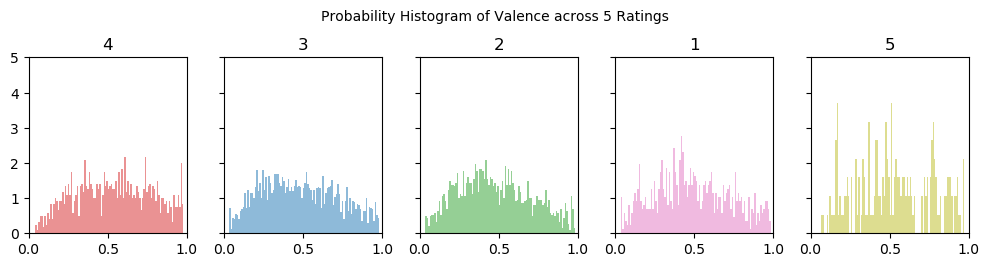

In [77]:
# Plot histograms for valence across 5 ratings 
fig, axes = plt.subplots(1, 5, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

for i, (ax, rating) in enumerate(zip(axes.flatten(), df.ratings.unique())):
    x = df.loc[df.ratings==rating, 'valence']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(rating), color=colors[i])
    ax.set_title(rating)

plt.suptitle('Probability Histogram of Valence across 5 Ratings', y=1.05, size=10)
ax.set_xlim(0, 1); ax.set_ylim(0, 5);
plt.tight_layout();

When looking at the histograms, it appears that all ratings have similar distributions for valence. On the KDE graph, interestingly, the rating of 5, unlike the other ratings, appears to have two modes; around 0.5 and again around 0.80. Overall, more songs that have a 5 rating have higher valence values.

#### h. Loudness

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loudness, dtype: object

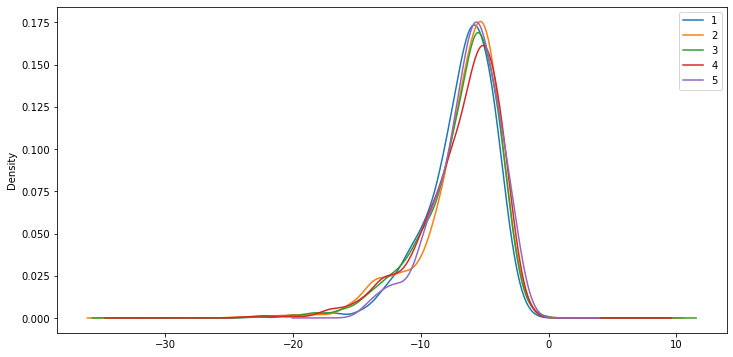

In [78]:
#Plot KDE graph for valence across all ratings 
df.groupby("ratings").loudness.plot(kind='kde', legend=True, figsize=(12,6))

Loudness shows similar distributions across ratings. The distribution for 4 and 5 have slightly higher levels of loudness than lower ratings, but this difference is negligible.

### i. Duration

ratings
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_ms, dtype: object

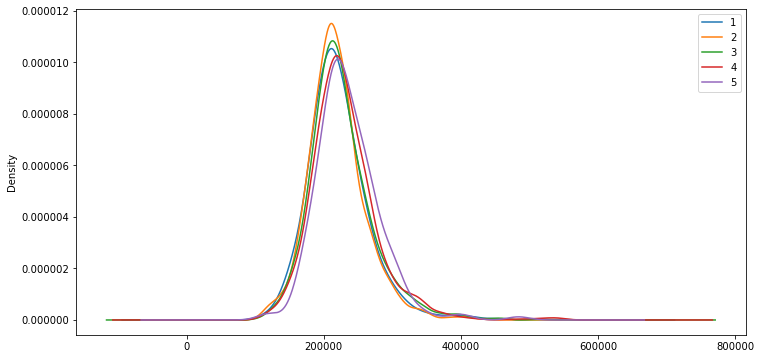

In [79]:
#Plot KDE graph for valence across all ratings 
df.groupby("ratings").duration_ms.plot(kind='kde', legend=True, figsize=(12,6))

The distribution for duration is similar across ratings, however songs with ratings of 5 have slightly highly levels of duration than other rated songs.

### Genres

In [80]:
df['genres'].nunique()

474

In [83]:
df['genres'] = df['genres'].astype('str')

In [84]:
df['genres'].value_counts()

dance pop               1001
unknown                  264
alternative dance        262
electropop               246
album rock               238
                        ... 
ghanaian hip hop           1
bebop                      1
hawaiian                   1
jewish pop                 1
north carolina indie       1
Name: genres, Length: 474, dtype: int64

In [85]:
#Check for NA values
df['genres'].isna().sum()

0

In [86]:
def genrecategory(value):
    if 'country' in value:
        return 'country'
    elif 'dance' in value:
        return 'dance'
    elif 'rock' in value:
        return 'rock'
    elif 'indie' in value:
        return 'indie'
    elif 'rap' in value:
        return 'rap'
    elif 'elect' in value:
        return 'electronic'
    elif 'hip hop' in value:
        return 'hip hop'
    elif 'house' in value:
        return 'house'
    elif 'soul' in value:
        return 'soul'
    elif 'acoustic' in value:
        return 'acoustic'
    elif 'emo' in value:
        return 'punk'
    elif 'pop' in value:
        return 'pop'
    elif 'r&b' in value:
        return 'r&b'
    elif 'metal' in value:
        return 'punk'
    elif 'unknown' in value:
        return 'Other'
    elif 'boy band' in value:
        return 'pop'
    elif 'punk' in value:
        return 'punk'
    elif 'permanent wave' in value:
        return 'punk'
    elif 'edm' in value:
        return 'dance'
    elif 'neo mellow' in value:
        return 'pop'
    elif 'hopebeat' in value:
        return 'indie'
    elif 'funk' in value:
        return 'indie'
    elif 'adult standards' in value:
        return 'pop'
    elif 'disney' in value:
        return 'pop'
    elif 'beatlesque' in value:
        return 'rock'
    elif 'reggae fusion' in value:
        return 'indie'
    elif 'hollywood' in value:
        return 'pop'
    else:
        return 'Other'

In [87]:
df['genrecategory'] = df['genres'].map(lambda n: genrecategory(n))

In [88]:
df['genrecategory'].value_counts()

dance         1513
pop           1363
rock           958
Other          896
indie          708
punk           320
electronic     304
hip hop        256
country        148
r&b            147
soul           144
acoustic       139
rap            100
house           45
Name: genrecategory, dtype: int64

In [92]:
#Turn the decade variable into a dummy variable
df_temp = df['genrecategory']
df_temp = pd.get_dummies(df_temp, drop_first=True, prefix='genre')

In [94]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 10002
Data columns (total 13 columns):
genre_acoustic      7041 non-null uint8
genre_country       7041 non-null uint8
genre_dance         7041 non-null uint8
genre_electronic    7041 non-null uint8
genre_hip hop       7041 non-null uint8
genre_house         7041 non-null uint8
genre_indie         7041 non-null uint8
genre_pop           7041 non-null uint8
genre_punk          7041 non-null uint8
genre_r&b           7041 non-null uint8
genre_rap           7041 non-null uint8
genre_rock          7041 non-null uint8
genre_soul          7041 non-null uint8
dtypes: uint8(13)
memory usage: 144.4 KB


In [95]:
#join the new dataframe of our dummies with our original dataset 
df = pd.concat([df, df_temp], axis=1, join='inner')

In [99]:
#Drop unncessary columns
df = df.drop(['genrecategory', 'genres'], axis=1)

KeyError: "['genrecategory' 'genres'] not found in axis"

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 10002
Data columns (total 36 columns):
is_explicit         7041 non-null int64
track_id            7041 non-null object
danceability        7041 non-null float64
energy              7041 non-null float64
key                 7041 non-null int64
loudness            7041 non-null float64
mode                7041 non-null int64
speechiness         7041 non-null float64
acousticness        7041 non-null float64
instrumentalness    7041 non-null float64
liveness            7041 non-null float64
valence             7041 non-null float64
tempo               7041 non-null float64
duration_ms         7041 non-null int64
genres              7041 non-null object
ratings             7041 non-null int64
decade_1960         7041 non-null uint8
decade_1970         7041 non-null uint8
decade_1980         7041 non-null uint8
decade_1990         7041 non-null uint8
decade_2000         7041 non-null uint8
decade_2010         7041 non-nul

### Takeaways

In [81]:
###Notes


#do overlapping histograms on one chart to see how certain features vary across different ratings 
#extract all songs that are rated 3 for example and do a danceability hist on that 
#find a way to compare them on one graph 


# see if distribution is different across the ratings and we hpe to see differneces 
# If not, can look at recall/preciison scores etc within each class (scores for a rating of 1, 2, 3, etc)
#can also reweight the bins 
#can icnlude artists by coming up with some cluster of certain artists 


## interactive dashboard on one thing - could be something to look at at end of project 
## Jupyterdash 

In [82]:
df.to_csv('modelingdata')